# Import Libraries and Data

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

maindf = pd.read_csv('movies.csv')

In [103]:
maindf

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
5417,7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
5418,7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
5419,7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


# Cleaning the data

In [100]:
#Dropping rows that have even one null value
maindf = maindf.dropna()

In [101]:
maindf = maindf.reset_index()

In [102]:
#Checking null values by column
for column in maindf.columns:
    missing = np.mean(maindf[column].isnull())
    print('{} - {}%'.format(column, missing))

index - 0.0%
name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [104]:
#Checking if any nulls in the whole df
maindf.isnull().values.any()

False

In [105]:
maindf.dtypes

index         int64
name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [106]:
maindf = maindf.drop('index', axis=1)

In [107]:
#Changing data type of float fields to int since that is more appropriate for those fields

maindf['budget'] = maindf['budget'].astype('int64')
maindf['gross'] = maindf['gross'].astype('int64')
maindf['votes'] = maindf['votes'].astype('int64')
maindf['runtime'] = maindf['runtime'].astype('int64')



In [108]:
#Sort records in the df by the gross value of the movie
maindf = maindf.sort_values(by=['gross'], inplace=False, ascending=False)

In [109]:
maindf.drop_duplicates() #The number of rows here match the number of rows we have orginally in the df so there are no duplicates in our df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3731,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
5302,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
1795,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
5158,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
1378,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
2286,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
154,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


# Plotting the data

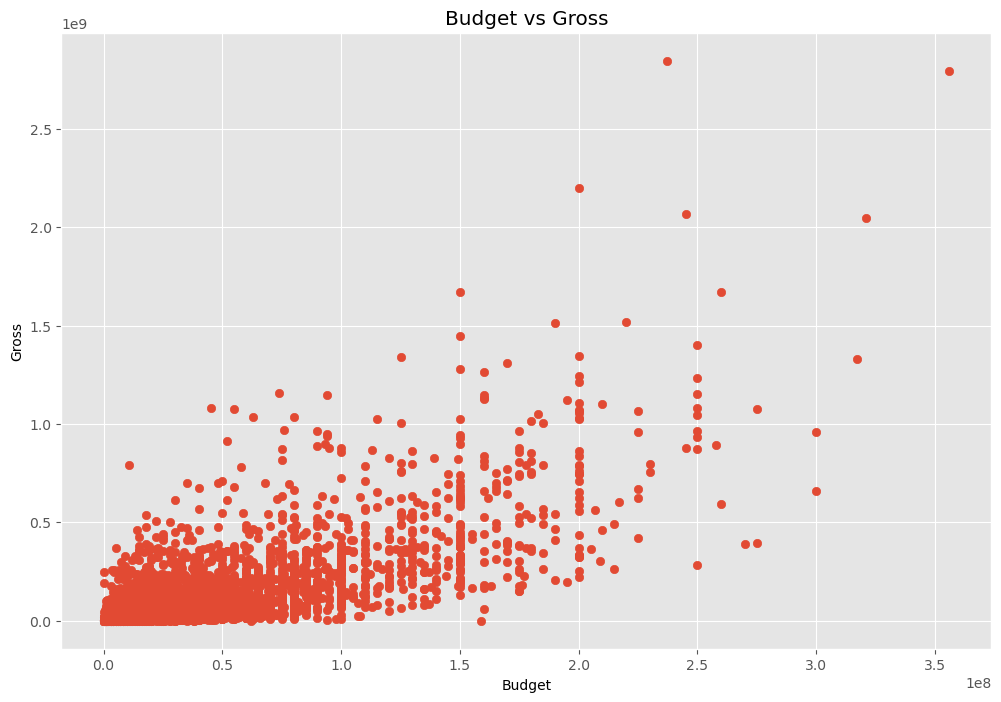

In [110]:
#Regular scatter plot of the Budget vs Gross of the movies
plt.scatter(x=maindf['budget'], y=maindf['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

[Text(0.5, 1.0, 'Gross vs Budget')]

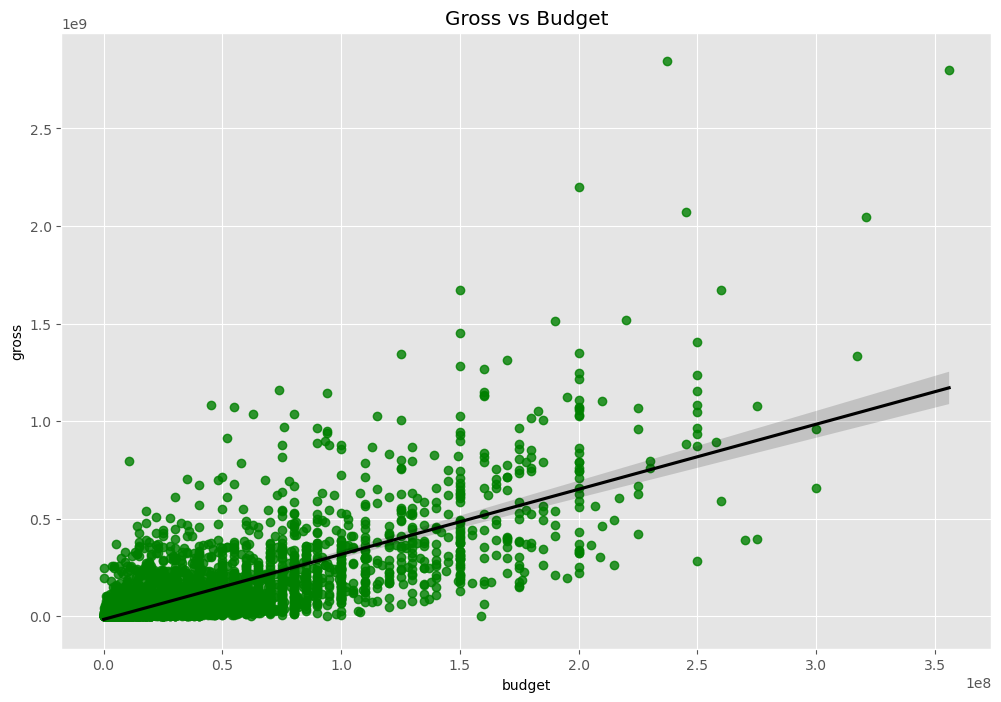

In [111]:
#Seaborn scatter plot of Budget vs Gross of the movies with customization
sns.regplot(x='budget', y='gross', data=maindf, scatter_kws={"color": "green"}, line_kws={"color": "black"}).set(title='Gross vs Budget')

# Correlation Matrices and Plots between different fields

In [112]:
#Pearson Correlation Matrix
maindf.corr()

C:\Users\Kranthi\AppData\Local\Temp\ipykernel_37600\1244027269.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  maindf.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


C:\Users\Kranthi\AppData\Local\Temp\ipykernel_37600\1149836667.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = maindf.corr()


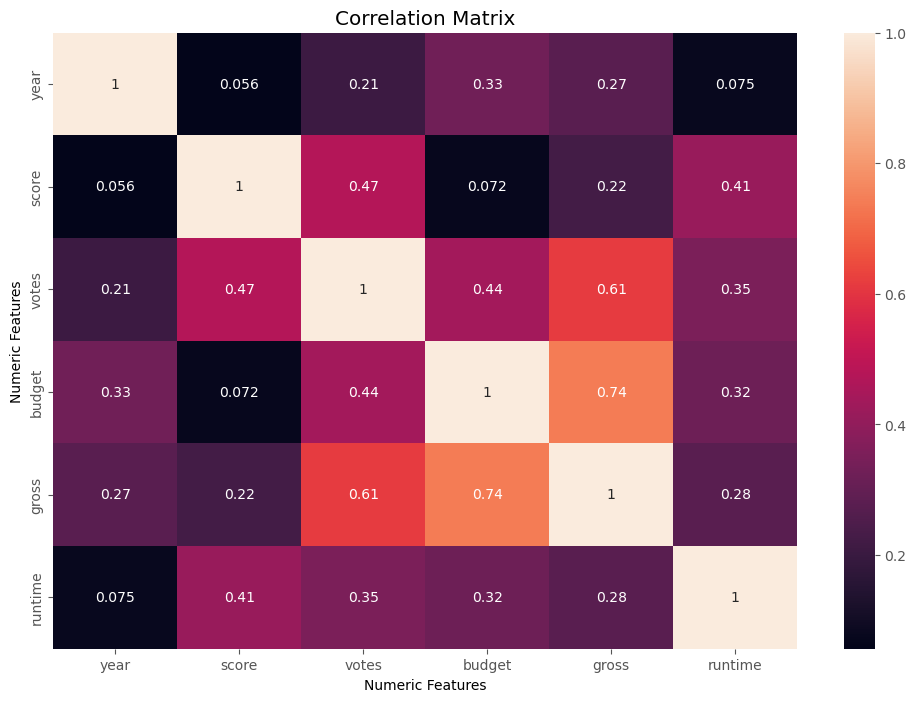

In [113]:
corr_mat = maindf.corr()
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Numeric Features')
plt.ylabel('Numeric Features')
plt.show()

In [114]:
#Encoding the non-numeric fields as numbers so that they can be used for the correlation matrix

maindf_num = maindf

for col in maindf_num.columns:
    if(maindf_num[col].dtype == 'object'):
        maindf_num[col] = maindf_num[col].astype('category')
        maindf_num[col] = maindf_num[col].cat.codes

In [115]:
maindf_num

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3731,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162
5302,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181
1795,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194
4730,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138
5158,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96
1378,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97
2286,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108
154,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85


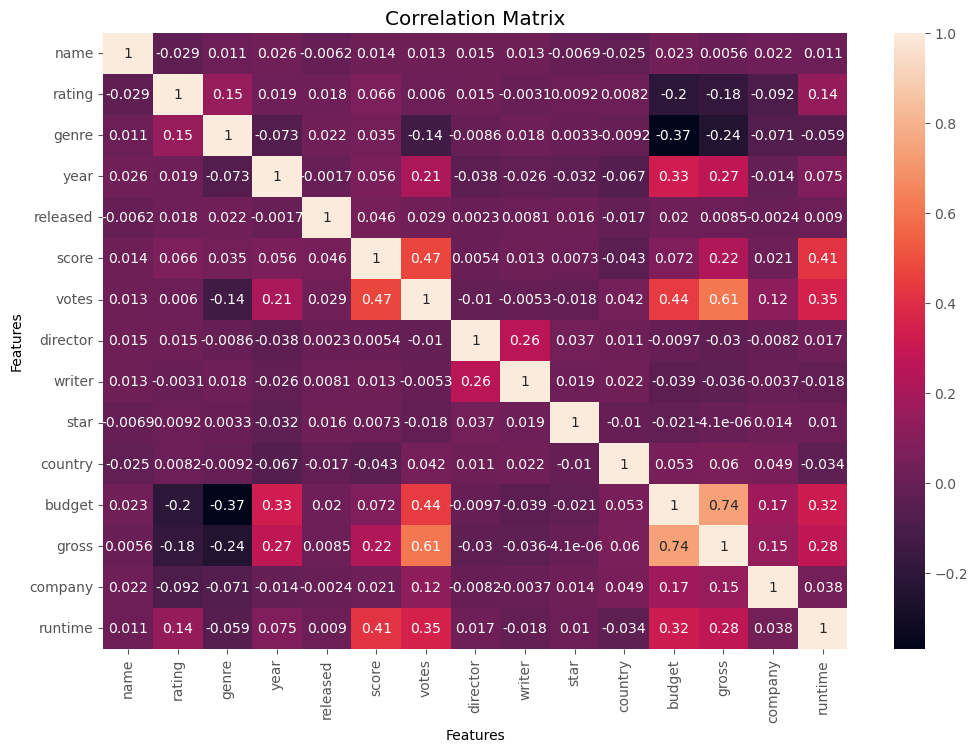

In [88]:
#Correlation matrix with the new df that has all numeric fields including the converted non-numeric fields

corr_mat1 = maindf_num.corr()
sns.heatmap(corr_mat1, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [116]:
#Unstacking the correlation matrix values for better interpretability
corr_pairs = corr_mat1.unstack()
corr_pairs

name     name        1.000000
         rating     -0.029234
         genre       0.010996
         year        0.025542
         released   -0.006152
                       ...   
runtime  country    -0.034477
         budget      0.318695
         gross       0.275796
         company     0.037585
         runtime     1.000000
Length: 225, dtype: float64

In [117]:
#Sorting the unstacked pairs of the correlation matrix
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [118]:
#Attaining only those correlation matrix pair values that are higher than 0.5
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

The number of votes ('votes') and the budget of the movie ('budget') seem to have a very high correlation with how much money the movie makes ('gross').
This makes sense because usually higher budget films tend to draw larger crowds and the more people watch a movie, the more votes it would have as well. 
This is reflected by the Gross - Budget and Gross - Votes correlation values.